#Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

#Importing Dataset


In [ ]:
data = pd.read_csv("28-MobilePriceRange.csv")
data.head(5)

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRange
0,842,7,2.2,2,2549,19,0,0,0,1,...,0.6,188,0,9,7,1,2,20,756,Medium
1,1021,53,0.5,3,2631,7,1,1,1,0,...,0.7,136,1,17,3,0,6,905,1988,High
2,563,41,0.5,5,2603,9,1,1,1,0,...,0.9,145,1,11,2,2,6,1263,1716,High
3,615,10,2.5,6,2769,11,0,1,0,0,...,0.8,131,0,16,8,0,9,1216,1786,High
4,1821,44,1.2,2,1411,15,0,1,1,0,...,0.6,141,1,8,2,13,14,1208,1212,Medium


In [ ]:
data.info()

NameError: name 'data' is not defined

In [ ]:
missing_data = data.isnull().sum()
print("Missing Data: \n" ,missing_data)

Missing Data: 
 BatteryPower      0
InternalMemory    0
ClockSpeed        0
NoOfCores         0
RAM               0
TalkTime          0
DualSim           0
3G                0
4G                0
WiFi              0
Bluetooth         0
MobileDepth       0
MobileWeight      0
TouchScreen       0
ScreenHeight      0
ScreenWidth       0
FrontCameraPx     0
RearCameraPX      0
PxHeight          0
PxWeight          0
PriceRange        0
dtype: int64


In [ ]:
data["PriceRange"].value_counts()

,count
PriceRange,
Medium,500
High,500
VeryHigh,500
Low,500


## Clean & encode 'PriceRange' column

In [ ]:
data['PriceRange'] = data['PriceRange'].astype(str).str.strip().str.title()
mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Veryhigh': 3}
data.insert(data.columns.get_loc('PriceRange'), 'PriceRangeEncoded', data['PriceRange'].map(mapping))
data['PriceRange'] = data.pop('PriceRange')

In [ ]:
data.head(5)

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRangeEncoded,PriceRange
0,842,7,2.2,2,2549,19,0,0,0,1,...,188,0,9,7,1,2,20,756,1,Medium
1,1021,53,0.5,3,2631,7,1,1,1,0,...,136,1,17,3,0,6,905,1988,2,High
2,563,41,0.5,5,2603,9,1,1,1,0,...,145,1,11,2,2,6,1263,1716,2,High
3,615,10,2.5,6,2769,11,0,1,0,0,...,131,0,16,8,0,9,1216,1786,2,High
4,1821,44,1.2,2,1411,15,0,1,1,0,...,141,1,8,2,13,14,1208,1212,1,Medium


#Drop last column(PriceRange)


In [ ]:
data= data.drop(columns=['PriceRange'])

In [ ]:
data.head(4)

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRangeEncoded
0,842,7,2.2,2,2549,19,0,0,0,1,...,0.6,188,0,9,7,1,2,20,756,1
1,1021,53,0.5,3,2631,7,1,1,1,0,...,0.7,136,1,17,3,0,6,905,1988,2
2,563,41,0.5,5,2603,9,1,1,1,0,...,0.9,145,1,11,2,2,6,1263,1716,2
3,615,10,2.5,6,2769,11,0,1,0,0,...,0.8,131,0,16,8,0,9,1216,1786,2


In [ ]:
data["PriceRangeEncoded"].value_counts()

,count
PriceRangeEncoded,
1,500
2,500
3,500
0,500


In [ ]:
data.describe()

,BatteryPower,InternalMemory,ClockSpeed,NoOfCores,RAM,TalkTime,DualSim,3G,4G,WiFi,...,MobileDepth,MobileWeight,TouchScreen,ScreenHeight,ScreenWidth,FrontCameraPx,RearCameraPX,PxHeight,PxWeight,PriceRangeEncoded
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,32.046500,1.522250,4.520500,2124.213000,11.011000,0.509500,0.761500,0.521500,0.507000,...,0.501750,140.249000,0.503000,12.306500,5.767000,4.309500,9.916500,645.108000,1251.515500,1.500000
std,439.418206,18.145715,0.816004,2.287837,1084.732044,5.463955,0.500035,0.426273,0.499662,0.500076,...,0.288416,35.399655,0.500116,4.213245,4.356398,4.341444,6.064315,443.780811,432.199447,1.118314
min,501.000000,2.000000,0.500000,1.000000,256.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,80.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000
25%,851.750000,16.000000,0.700000,3.000000,1207.500000,6.000000,0.000000,1.000000,0.000000,0.000000,...,0.200000,109.000000,0.000000,9.000000,2.000000,1.000000,5.000000,282.750000,874.750000,0.750000
50%,1226.000000,32.000000,1.500000,4.000000,2146.500000,11.000000,1.000000,1.000000,1.000000,1.000000,...,0.500000,141.000000,1.000000,12.000000,5.000000,3.000000,10.000000,564.000000,1247.000000,1.500000
75%,1615.250000,48.000000,2.200000,7.000000,3064.500000,16.000000,1.000000,1.000000,1.000000,1.000000,...,0.800000,170.000000,1.000000,16.000000,9.000000,7.000000,15.000000,947.250000,1633.000000,2.250000
max,1998.000000,64.000000,3.000000,8.000000,3998.000000,20.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,200.000000,1.000000,19.000000,18.000000,19.000000,20.000000,1960.000000,1998.000000,3.000000


#Outliar Check

In [ ]:
import pandas as pd

def find_outliers_iqr_multiple(data, columns):
    outliers_dict = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"Column '{col}' has {outliers.shape[0]} outliers")
        outliers_dict[col] = outliers
    return outliers_dict

columns_to_check = [
    'BatteryPower', 'InternalMemory', 'ClockSpeed', 'NoOfCores', 'RAM', 'TalkTime',
    'DualSim', '3G', '4G', 'WiFi', 'Bluetooth', 'MobileDepth', 'MobileWeight',
    'TouchScreen', 'ScreenHeight', 'ScreenWidth', 'FrontCameraPx', 'RearCameraPX',
    'PxHeight', 'PxWeight'
]
outliers = find_outliers_iqr_multiple(data, columns_to_check)

Column 'BatteryPower' has 0 outliers
Column 'InternalMemory' has 0 outliers
Column 'ClockSpeed' has 0 outliers
Column 'NoOfCores' has 0 outliers
Column 'RAM' has 0 outliers
Column 'TalkTime' has 0 outliers
Column 'DualSim' has 0 outliers
Column '3G' has 477 outliers
Column '4G' has 0 outliers
Column 'WiFi' has 0 outliers
Column 'Bluetooth' has 0 outliers
Column 'MobileDepth' has 0 outliers
Column 'MobileWeight' has 0 outliers
Column 'TouchScreen' has 0 outliers
Column 'ScreenHeight' has 0 outliers
Column 'ScreenWidth' has 0 outliers
Column 'FrontCameraPx' has 18 outliers
Column 'RearCameraPX' has 0 outliers
Column 'PxHeight' has 2 outliers
Column 'PxWeight' has 0 outliers


#Outlair relaced by mean


In [ ]:
import numpy as np
def replace_outliers_with_mean(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  mean_value = data[column].mean()
  data[column] = np.where(
      (data[column] < lower_bound) | (data[column] > upper_bound),
      mean_value,
      data[column],
  )

for col in columns_to_check:
  replace_outliers_with_mean(data, col)

outliers_after_replacement = find_outliers_iqr_multiple(data, columns_to_check)

Column 'BatteryPower' has 0 outliers
Column 'InternalMemory' has 0 outliers
Column 'ClockSpeed' has 0 outliers
Column 'NoOfCores' has 0 outliers
Column 'RAM' has 0 outliers
Column 'TalkTime' has 0 outliers
Column 'DualSim' has 0 outliers
Column '3G' has 477 outliers
Column '4G' has 0 outliers
Column 'WiFi' has 0 outliers
Column 'Bluetooth' has 0 outliers
Column 'MobileDepth' has 0 outliers
Column 'MobileWeight' has 0 outliers
Column 'TouchScreen' has 0 outliers
Column 'ScreenHeight' has 0 outliers
Column 'ScreenWidth' has 0 outliers
Column 'FrontCameraPx' has 0 outliers
Column 'RearCameraPX' has 0 outliers
Column 'PxHeight' has 0 outliers
Column 'PxWeight' has 0 outliers


In [ ]:
x = data.iloc[:, 1:-1]
y = data['PriceRangeEncoded']

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.select_dtypes(include='number'))

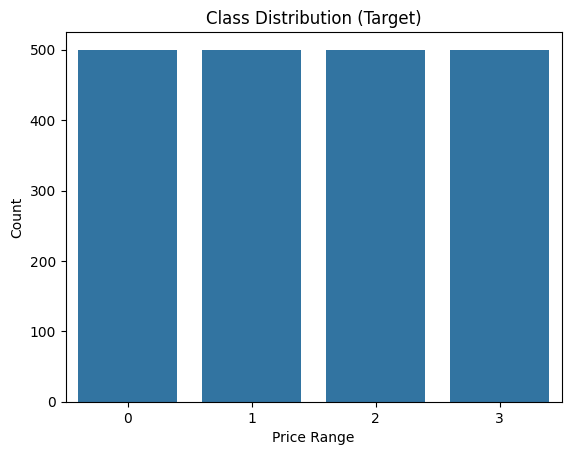

In [ ]:
# Basic EDA – Class Balance
sns.countplot(x=y)
plt.title('Class Distribution (Target)')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()


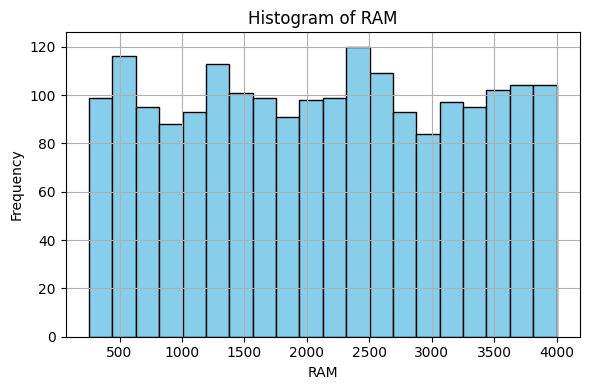

In [ ]:
#Histogram
feature = 'RAM'
plt.figure(figsize=(6,4))
plt.hist(x[feature], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#Correlation heatmap

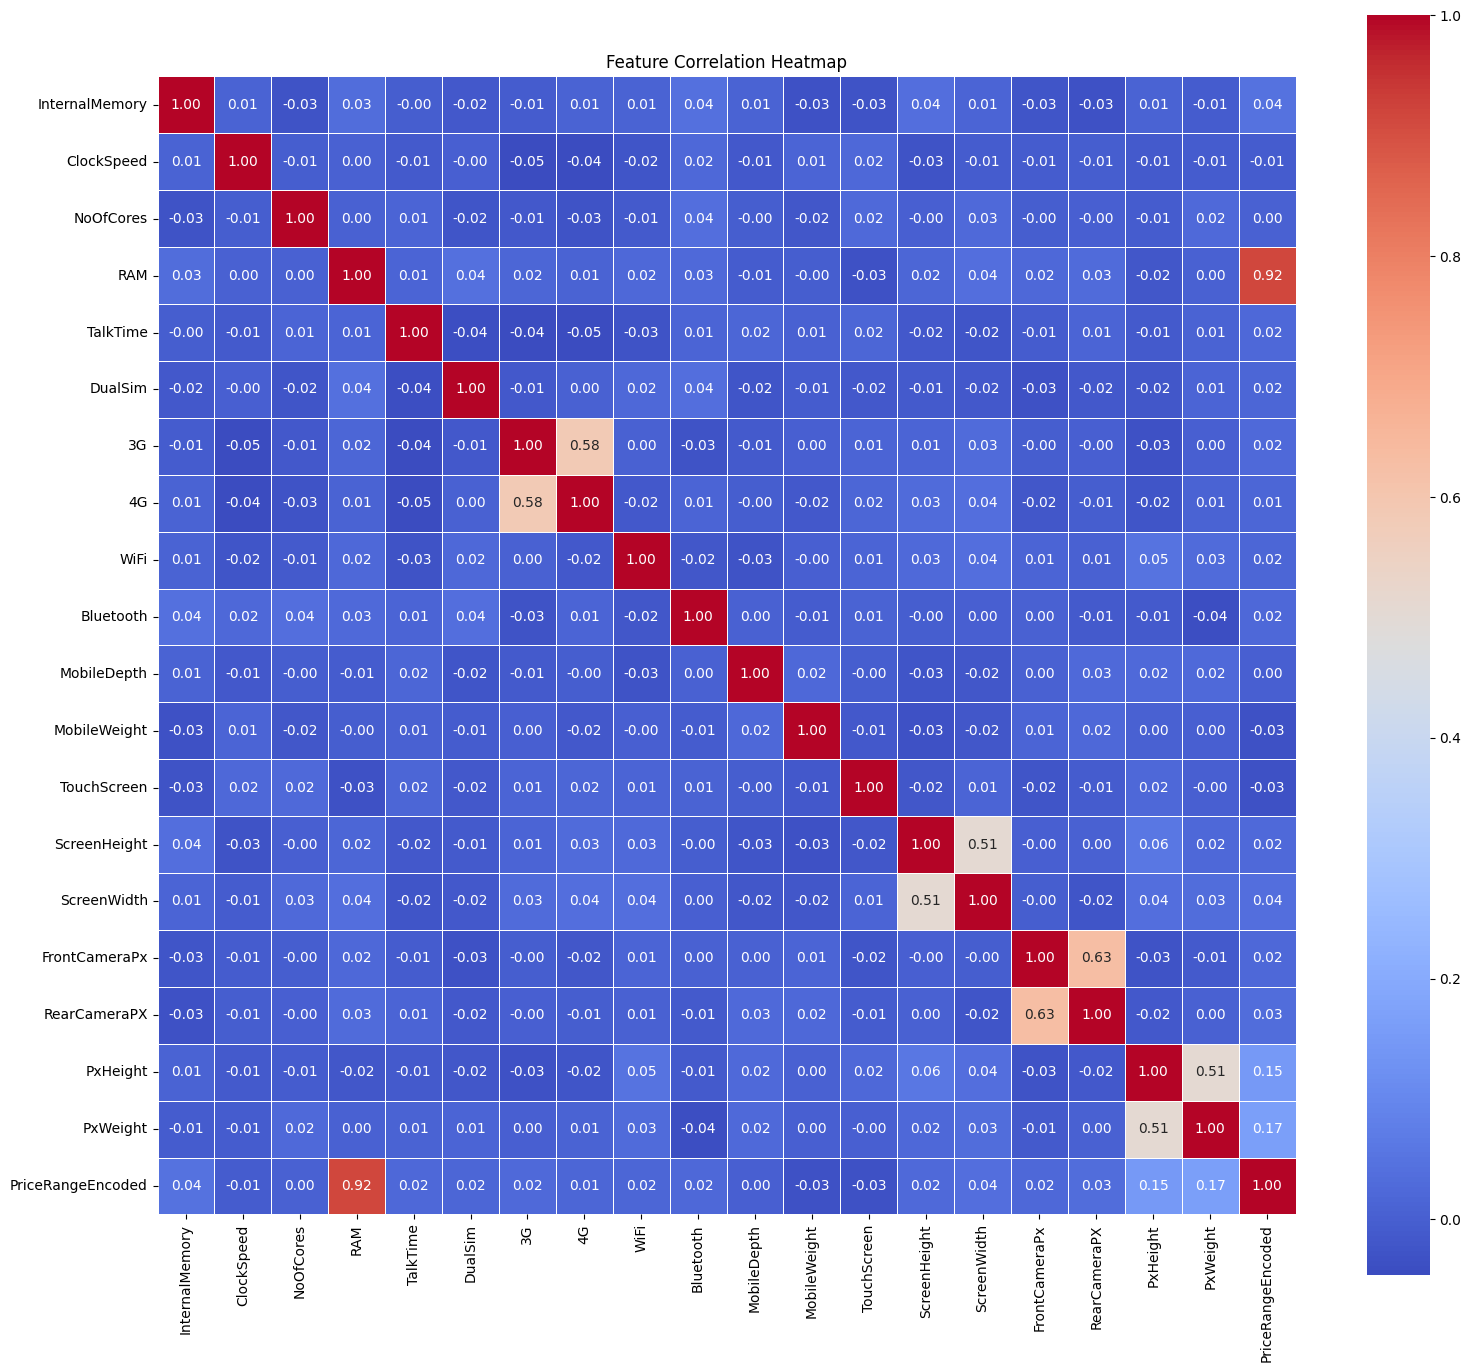

In [ ]:
plt.figure(figsize=(16,14))
sns.heatmap((x.assign(PriceRangeEncoded=y)).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

/tmp/ipython-input-19-2496389244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=x['RAM'], palette='Set3')


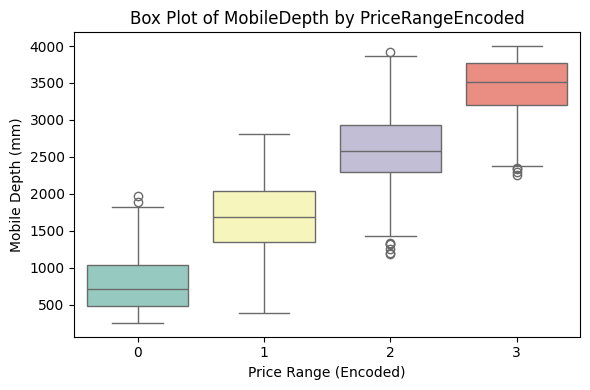

In [ ]:
#Box Plot (Feature vs Class – distribution & outliers)
plt.figure(figsize=(6,4))
sns.boxplot(x=y, y=x['RAM'], palette='Set3')
plt.title('Box Plot of MobileDepth by PriceRangeEncoded')
plt.xlabel('Price Range (Encoded)')
plt.ylabel('Mobile Depth (mm)')
plt.tight_layout()
plt.show()


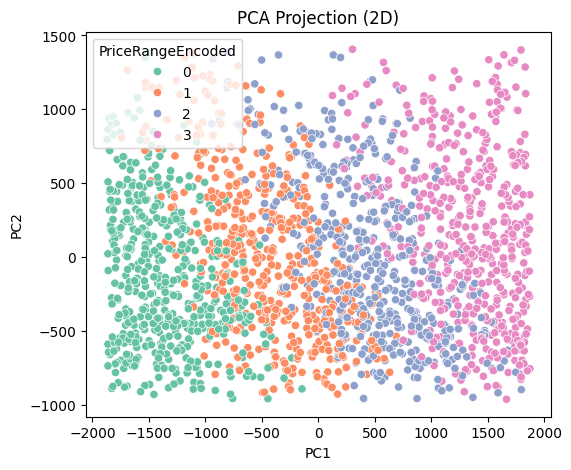

In [ ]:
#PCA Scatter Plot (2D Projection)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

plt.figure(figsize=(6,5))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y, palette='Set2')
plt.title('PCA Projection (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

/tmp/ipython-input-21-1049273186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x['NoOfCores'], palette='Set2')


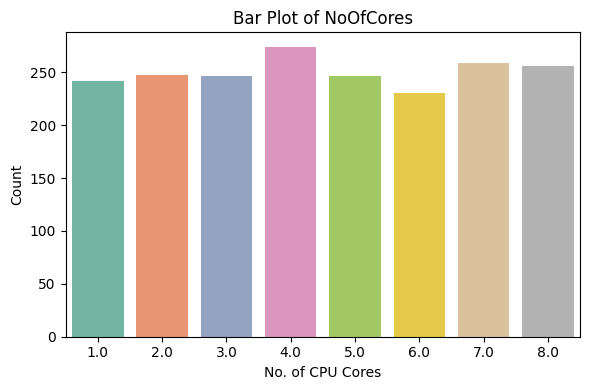

In [ ]:
#Bar Plot (Categorical feature বা summary aggregate দেখাতে)
#ধরো NoOfCores একটা discrete/categorical numeric feature (like 2, 4, 6, 8 cores):
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=x['NoOfCores'], palette='Set2')
plt.title('Bar Plot of NoOfCores')
plt.xlabel('No. of CPU Cores')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

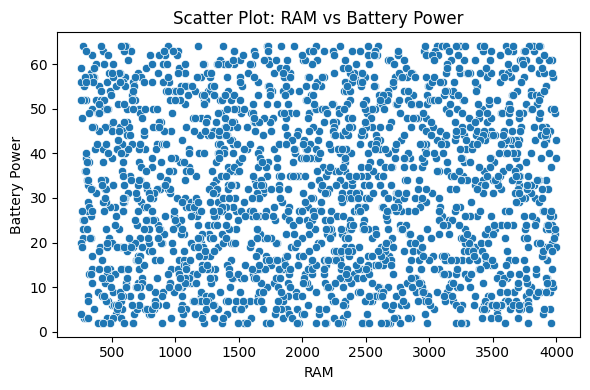

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=x['RAM'], y=x['InternalMemory'])
plt.title('Scatter Plot: RAM vs Battery Power')
plt.xlabel('RAM')
plt.ylabel('Battery Power')

plt.tight_layout()
plt.show()

# Feature Distribution By class

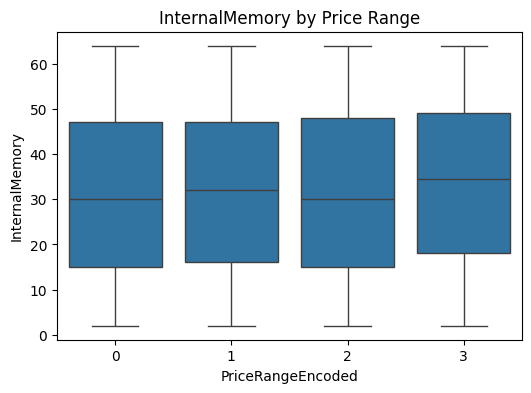

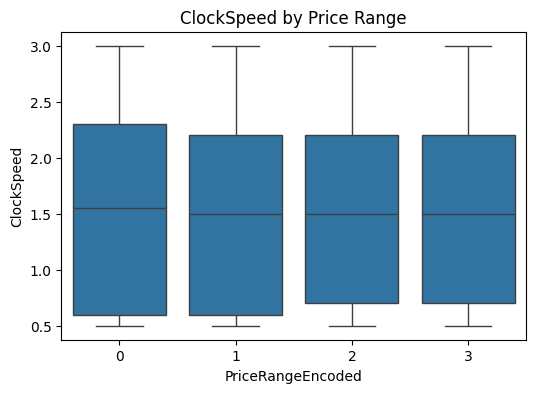

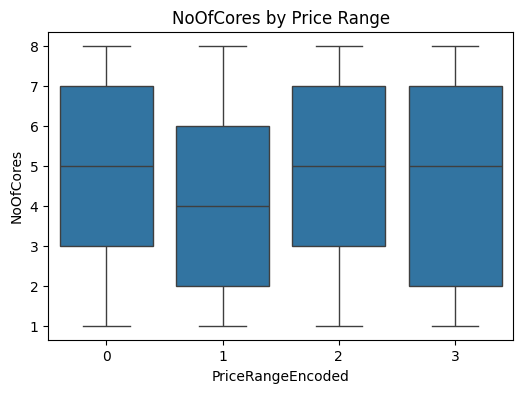

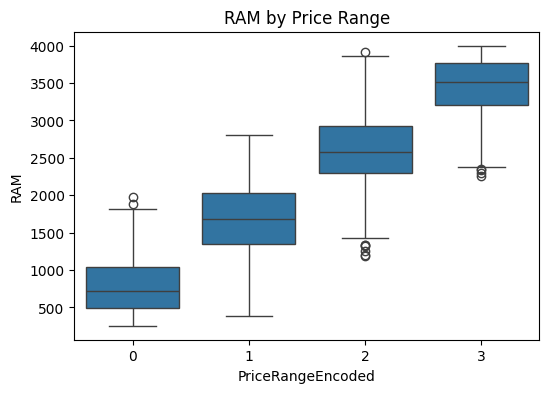

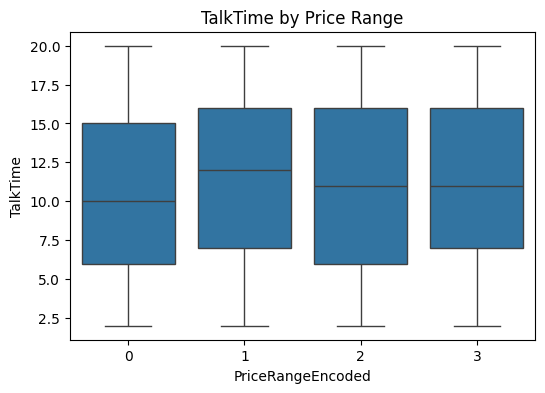

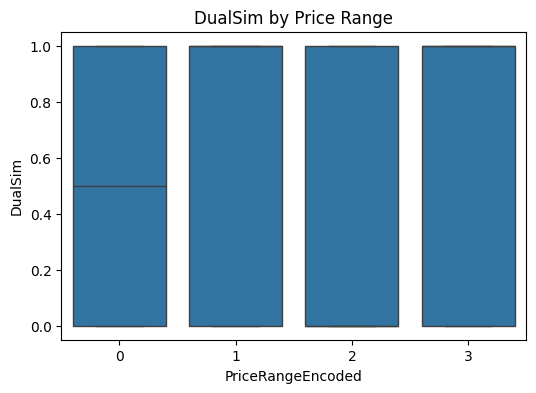

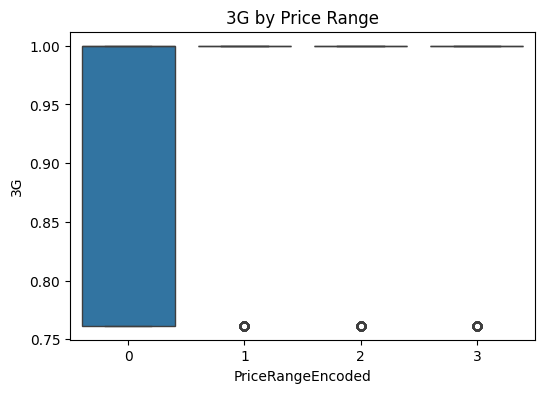

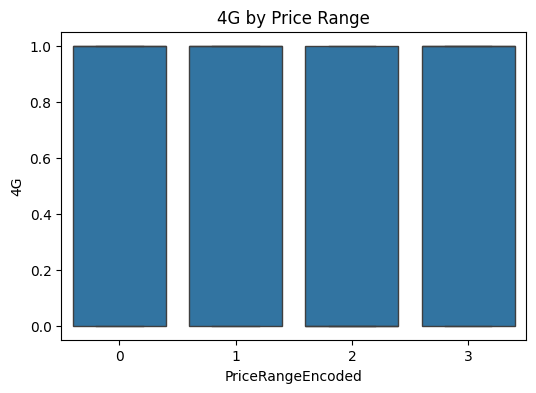

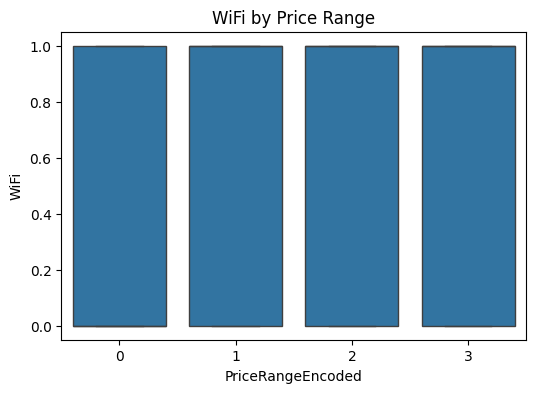

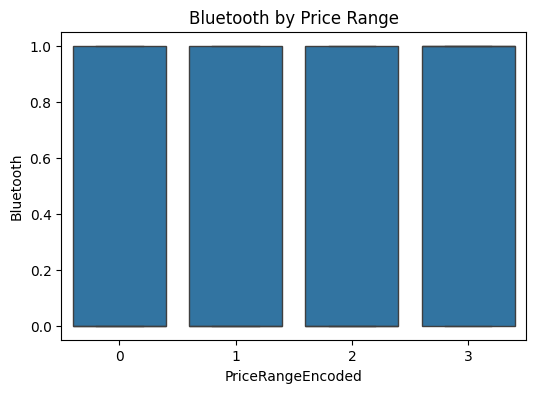

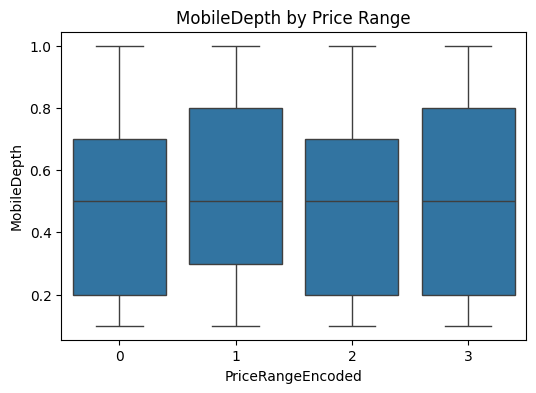

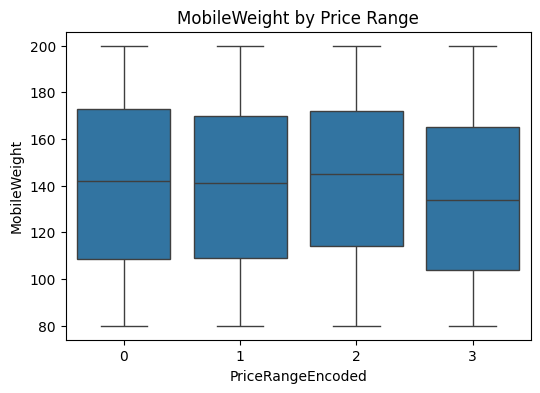

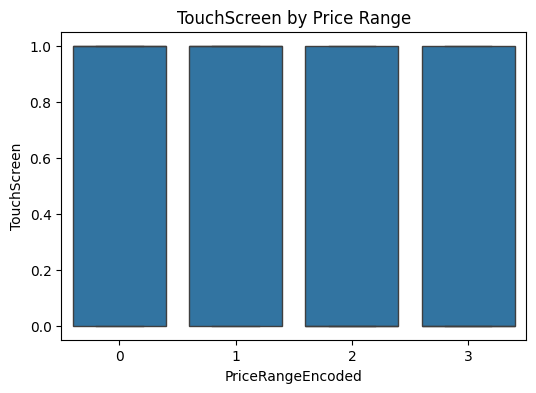

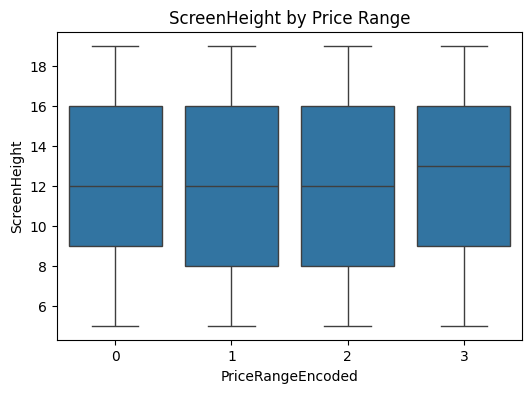

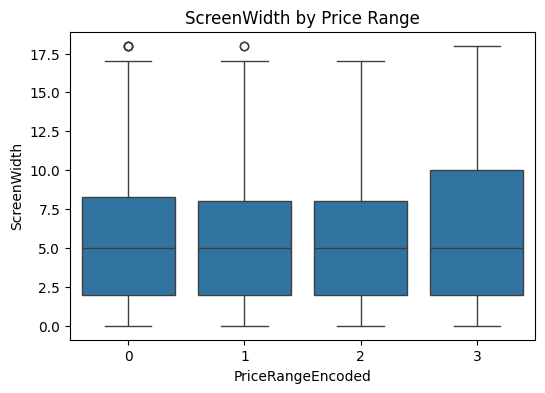

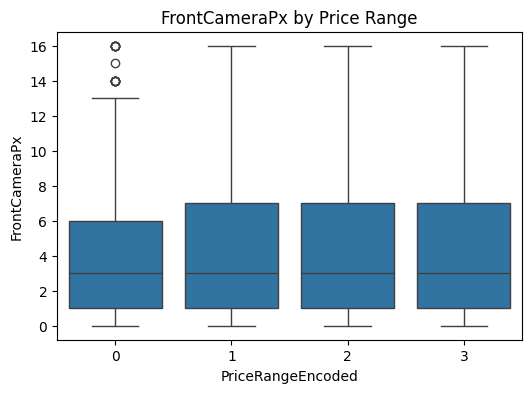

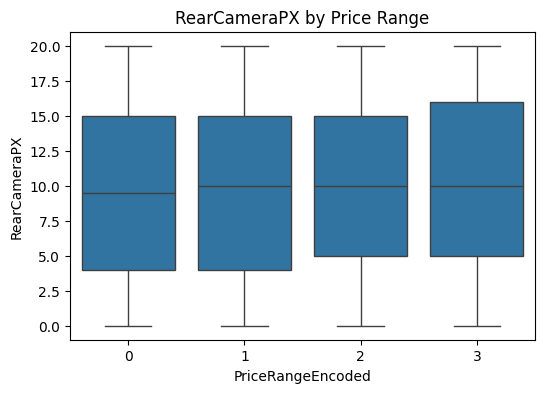

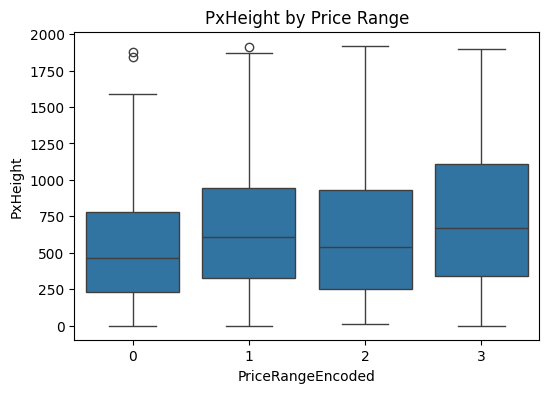

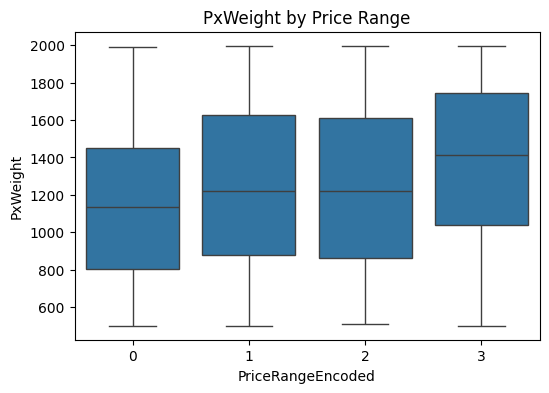

In [ ]:
for col in x.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=x[col])
    plt.title(f'{col} by Price Range')
    plt.show()

#Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_model, x, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation accuracies: [0.7975 0.775  0.805  0.7825 0.765 ]
Mean accuracy: 0.785


In [ ]:
#Train/Test Split & Random Forest Model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


print(f" Accuracy:  {100*test_acc:.4f}")

print("\n Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['Low', 'Medium', 'High', 'VeryHigh']))

 Accuracy:  78.2500

 Classification Report (Test Set):
              precision    recall  f1-score   support

         Low       0.87      0.88      0.87       105
      Medium       0.73      0.69      0.71        91
        High       0.66      0.72      0.69        92
    VeryHigh       0.85      0.82      0.84       112

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400



# K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_train_pred_knn = knn_model.predict(x_train)
y_test_pred_knn = knn_model.predict(x_test)

train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)


print(f"  Accuracy:  {test_acc_knn * 100:.4f}%")
print("\n Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_knn, target_names=['Low', 'Medium', 'High', 'VeryHigh']))

  Accuracy:  80.2500%

 Classification Report (Test Set):
              precision    recall  f1-score   support

         Low       0.88      0.87      0.88       105
      Medium       0.73      0.73      0.73        91
        High       0.70      0.75      0.72        92
    VeryHigh       0.88      0.85      0.86       112

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)


print(f" Accuracy:  {100*test_acc:.4f}")

print("\n Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['Low', 'Medium', 'High', 'VeryHigh']))

 Accuracy:  71.2500

 Classification Report (Test Set):
              precision    recall  f1-score   support

         Low       0.87      0.85      0.86       105
      Medium       0.60      0.64      0.62        91
        High       0.56      0.58      0.57        92
    VeryHigh       0.79      0.76      0.78       112

    accuracy                           0.71       400
   macro avg       0.71      0.70      0.71       400
weighted avg       0.72      0.71      0.71       400



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Confusion Matrix

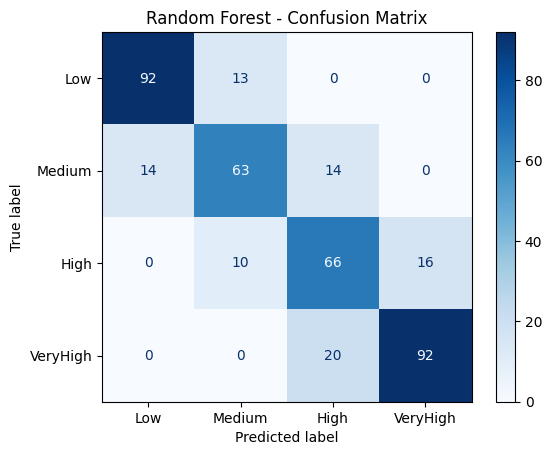

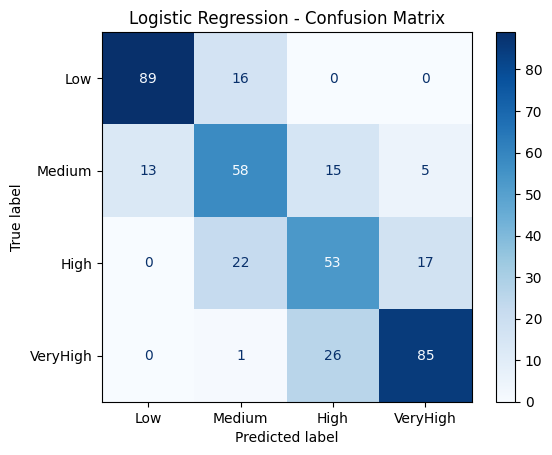

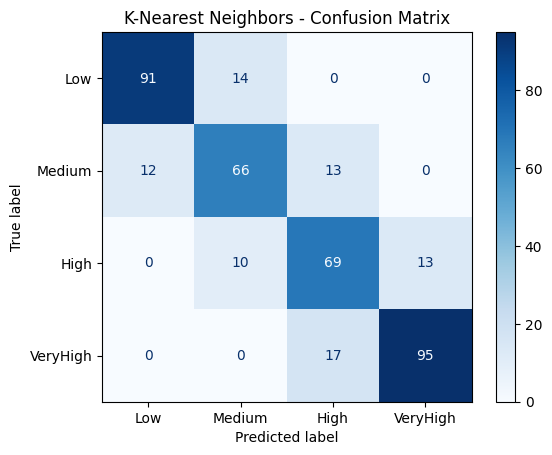

In [ ]:
#for random forest
labels = ['Low', 'Medium', 'High', 'VeryHigh']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

#for logistic regression
log_cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(log_cm, display_labels=['Low', 'Medium', 'High', 'VeryHigh']).plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

#for KNN
knn_cm = confusion_matrix(y_test, y_test_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("K-Nearest Neighbors - Confusion Matrix")
plt.show()

           Feature  Importance
3              RAM    0.478036
17        PxHeight    0.064656
18        PxWeight    0.063284
11    MobileWeight    0.046168
0   InternalMemory    0.043872
4         TalkTime    0.037384
16    RearCameraPX    0.035108
14     ScreenWidth    0.034606
1       ClockSpeed    0.033478
13    ScreenHeight    0.032134
15   FrontCameraPx    0.030304
10     MobileDepth    0.029626
2        NoOfCores    0.027123
5          DualSim    0.008101
12     TouchScreen    0.008051
9        Bluetooth    0.007793
7               4G    0.007347
8             WiFi    0.006901
6               3G    0.006028


/tmp/ipython-input-30-2166599631.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="crest")


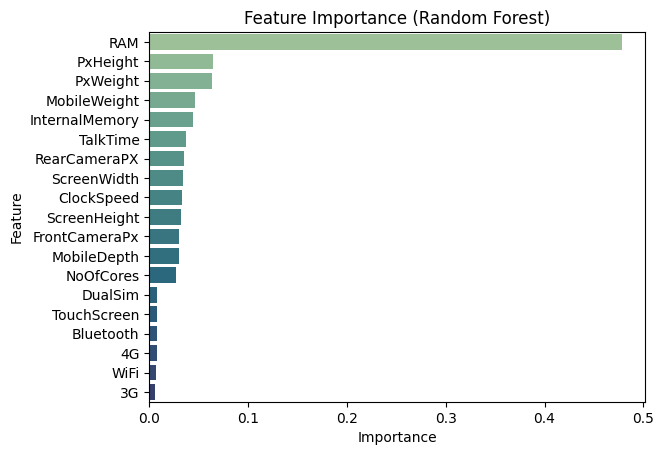

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="crest")
plt.title('Feature Importance (Random Forest)')
plt.show()

# Selecting features thorugh Feature Threshold

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
model = RandomForestClassifier()
model.fit(x, y)

importances = pd.Series(model.feature_importances_, index=x.columns)

# Selecting Important Feature through Threshold
selected_features = importances[importances > 0.029].sort_values(ascending=False)
dropped_features = importances[importances <= 0.029].sort_values(ascending=False)

In [ ]:
print("Selected Features:")
print(selected_features)

Selected Features:
RAM               0.482847
PxHeight          0.064233
PxWeight          0.063873
MobileWeight      0.045079
InternalMemory    0.041978
TalkTime          0.036248
ScreenWidth       0.034508
RearCameraPX      0.034104
ScreenHeight      0.033228
ClockSpeed        0.033196
FrontCameraPx     0.029200
dtype: float64


In [ ]:
print("\n Dropped Features (Low Importance):")
print(dropped_features)



 Dropped Features (Low Importance):
MobileDepth    0.027361
NoOfCores      0.027354
Bluetooth      0.008322
TouchScreen    0.008198
4G             0.007977
WiFi           0.007913
DualSim        0.007799
3G             0.006580
dtype: float64


# Accuracy check for all the models after droping features

In [ ]:
x_selected = x[selected_features.index]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)


print("Random Forest Acc: ", accuracy_score(y_test, rf.predict(x_test))*100)


Random Forest Acc:  78.75


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(x_train, y_train)


print(f"Logistic Regression Acc:  {accuracy_score(y_test, logreg.predict(x_test)) * 100:.2f}%")


Logistic Regression Acc:  68.50%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

print(f"KNN Acc:  {accuracy_score(y_test, knn.predict(x_test)) * 100:.2f}%")


KNN Acc:  80.25%


# Confusion matrix after Selecting Features

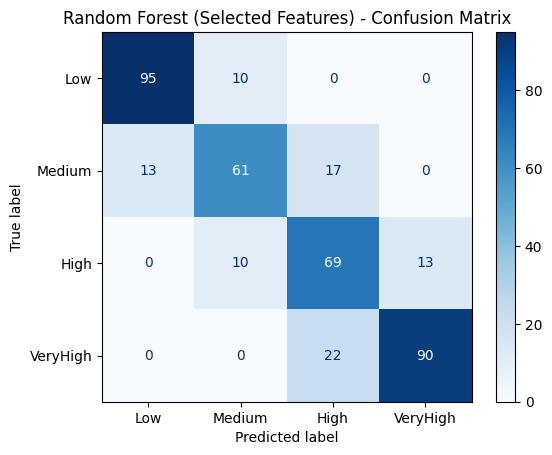

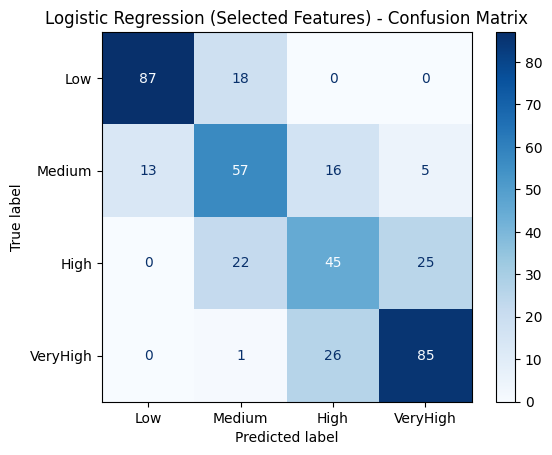

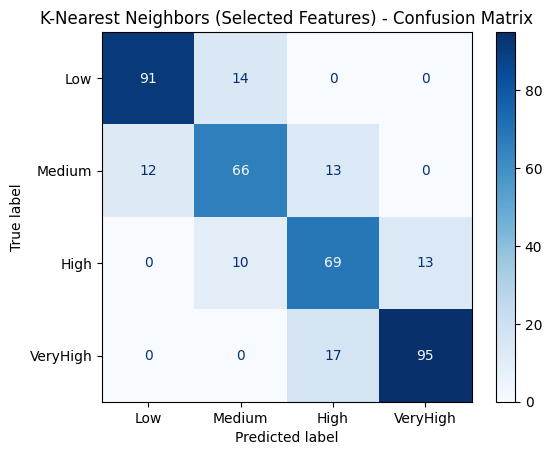

In [ ]:
labels = ['Low', 'Medium', 'High', 'VeryHigh']
cm = confusion_matrix(y_test, rf.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Random Forest (Selected Features) - Confusion Matrix")
plt.show()

#Logistic Regression
log_cm = confusion_matrix(y_test, logreg.predict(x_test))
ConfusionMatrixDisplay(log_cm, display_labels=['Low', 'Medium', 'High', 'VeryHigh']).plot(cmap='Blues')
plt.title("Logistic Regression (Selected Features) - Confusion Matrix")
plt.show()

# KNN Prediction
knn_cm = confusion_matrix(y_test, knn.predict(x_test))
ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=labels).plot(cmap='Blues')
plt.title("K-Nearest Neighbors (Selected Features) - Confusion Matrix")
plt.show()


In [ ]:
def replace_outliers_with_mean(data, columns):
    data_copy = data.copy()  # Create a copy to avoid modifying the original DataFrame
    for col in columns:
        Q1 = data_copy[col].quantile(0.25)
        Q3 = data_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = data_copy[col][(data_copy[col] >= lower_bound) & (data_copy[col] <= upper_bound)].mean()
        data_copy[col] = data_copy[col].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    return data_copy

In [ ]:
# Random Forest
y_pred_rf = rf.predict(x_test)

# Logistic Regression
y_pred_log = logreg.predict(x_test)

# K-Nearest Neighbors
y_pred_knn = knn.predict(x_test)


In [ ]:
# Print a sample prediction (optional demo)
print("Random Forest Prediction (1st sample):", y_pred_rf[0])
print("Logistic Regression Prediction (1st sample):", y_pred_log[0])
print("KNN Prediction (1st sample):", y_pred_knn[0])


Random Forest Prediction (1st sample): 0
Logistic Regression Prediction (1st sample): 0
KNN Prediction (1st sample): 0


In [ ]:
# Train model
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

# Evaluate
accuracy_score(y_test, y_pred)


0.7975

In [ ]:
# 🔮 Step: Make Predictions on Test Set

# Random Forest
y_pred_rf = rf.predict(x_test)
print(" Random Forest Prediction for first 5 samples:", y_pred_rf[:5])

# Logistic Regression
y_pred_log = logreg.predict(x_test)
print(" Logistic Regression Prediction for first 5 samples:", y_pred_log[:5])

# K-Nearest Neighbors
y_pred_knn = knn.predict(x_test)
print(" KNN Prediction for first 5 samples:", y_pred_knn[:5])


 Random Forest Prediction for first 5 samples: [0 2 0 3 1]
 Logistic Regression Prediction for first 5 samples: [0 1 0 2 1]
 KNN Prediction for first 5 samples: [0 2 0 3 1]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

data['ScreenArea'] = data['ScreenHeight'] * data['ScreenWidth']
data['TotalCamera'] = data['FrontCameraPx'] + data['RearCameraPX']
data['PixelDensity'] = (data['PxHeight'] * data['PxWeight']) / data['ScreenArea'].replace(0, 1e-7)
data['BatteryToRAM'] = data['BatteryPower'] / (data['RAM'] + 1)
data['MemoryToCore'] = data['InternalMemory'] / (data['NoOfCores'] + 1)
x = data.drop('PriceRangeEncoded', axis=1)
y = data['PriceRangeEncoded']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
print("Starting GridSearchCV... This may take several minutes...")
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1  # Use all processors
)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get best model and parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("\n" + "="*60)
print("GRIDSEARCHCV RESULTS")
print("="*60)
print(f"Best Parameters: {best_params}")

# Evaluate best model on training set
y_train_pred = best_rf.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Evaluate best model on test set
y_test_pred = best_rf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)

print("\n" + "="*60)
print("FINAL RANDOM FOREST EVALUATION")
print("="*60)
print(f"Accuracy:  {test_acc*100:.4f}%")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['Low', 'Medium', 'High', 'VeryHigh'], digits=4))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Low', 'Medium', 'High', 'VeryHigh']
)

# Learning curve (optional)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, x, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


Starting GridSearchCV... This may take several minutes...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

GRIDSEARCHCV RESULTS
Best Parameters: {'class_weight': None, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}

FINAL RANDOM FOREST EVALUATION
Accuracy:  89.2500%

Classification Report (Test Set):
              precision    recall  f1-score   support

         Low     0.9400    0.9400    0.9400       100
      Medium     0.8400    0.8400    0.8400       100
        High     0.8557    0.8300    0.8426       100
    VeryHigh     0.9320    0.9600    0.9458       100

    accuracy                         0.8925       400
   macro avg     0.8919    0.8925    0.8921       400
weighted avg     0.8919    0.8925    0.8921       400



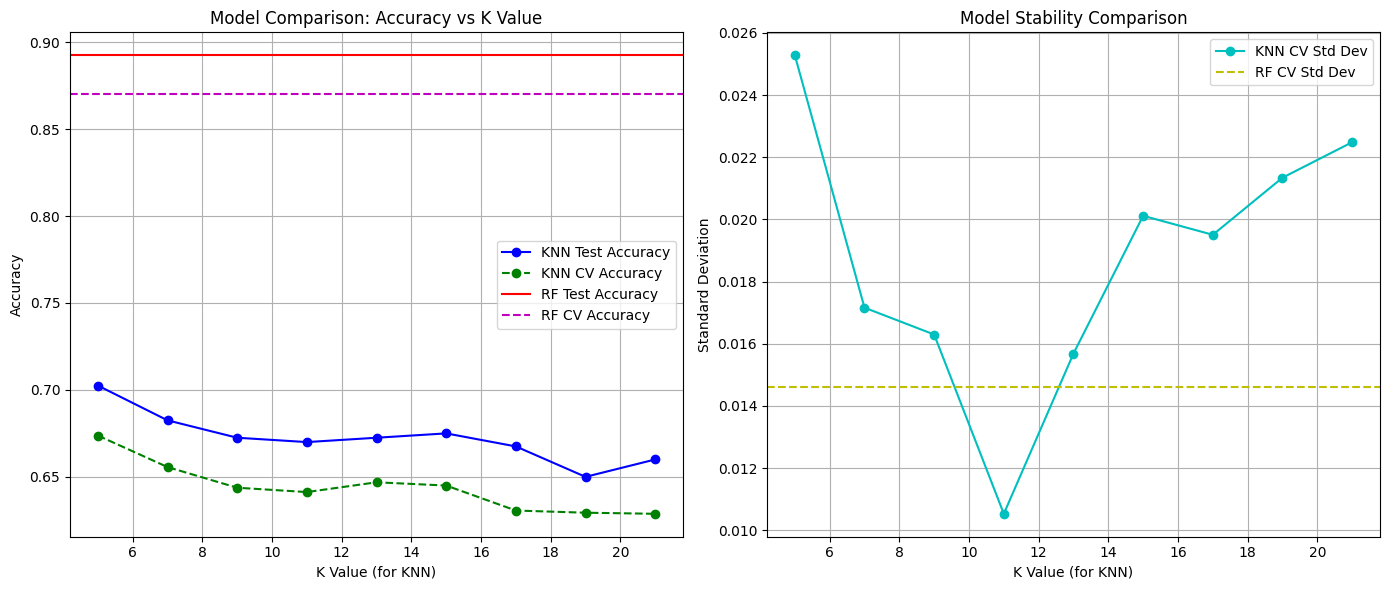


Detailed Performance Comparison
| Model         | K Value   |   Accuracy |   CV Mean Accuracy |    CV Std |
|:--------------|:----------|-----------:|-------------------:|----------:|
| Random Forest | N/A       |     0.8925 |           0.87     | 0.0146042 |
| KNN           | 5         |     0.7025 |           0.67375  | 0.0252797 |
| KNN           | 7         |     0.6825 |           0.655625 | 0.0171619 |
| KNN           | 9         |     0.6725 |           0.64375  | 0.016298  |
| KNN           | 11        |     0.67   |           0.64125  | 0.0105327 |
| KNN           | 13        |     0.6725 |           0.646875 | 0.0156874 |
| KNN           | 15        |     0.675  |           0.645    | 0.0201168 |
| KNN           | 17        |     0.6675 |           0.630625 | 0.0195056 |
| KNN           | 19        |     0.65   |           0.629375 | 0.0213417 |
| KNN           | 21        |     0.66   |           0.62875  | 0.0224826 |

Best KNN Configuration
Optimal K Value: 5
Test Accurac

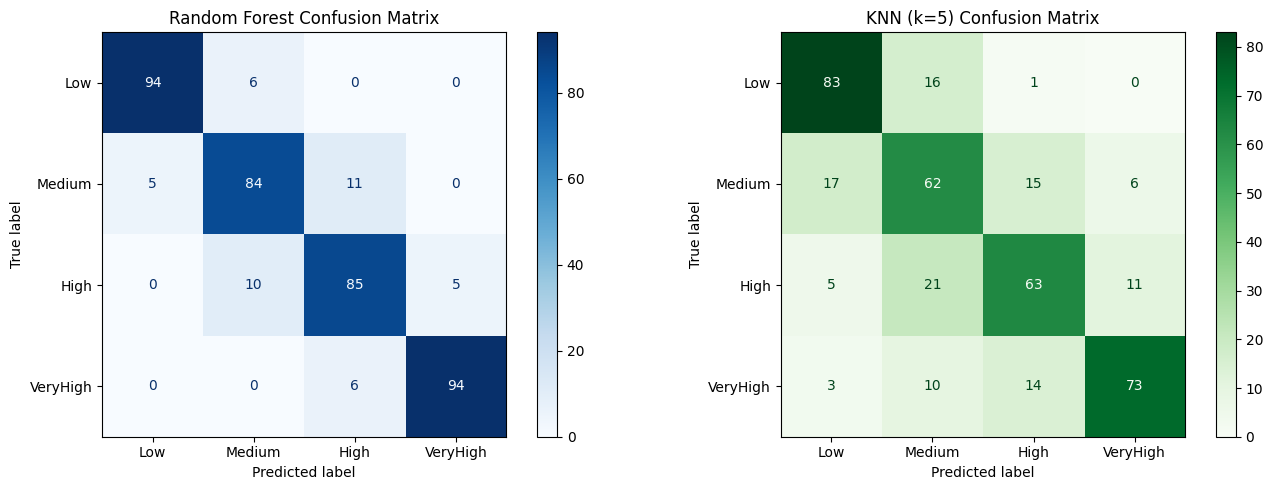

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize results storage
results = {
    'Model': [],
    'K Value': [],
    'Accuracy': [],
    'CV Mean Accuracy': [],
    'CV Std': []
}

# 1. Train and evaluate Random Forest
rf = RandomForestClassifier(n_estimators=300,
                          max_depth=15,
                          min_samples_split=5,
                          random_state=42,
                          n_jobs=-1)

rf_scores = cross_val_score(rf, x_train, y_train, cv=5, n_jobs=-1)
rf.fit(x_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(x_test))

results['Model'].append('Random Forest')
results['K Value'].append('N/A')
results['Accuracy'].append(rf_acc)
results['CV Mean Accuracy'].append(rf_scores.mean())
results['CV Std'].append(rf_scores.std())

# 2. Train and evaluate KNN for k=5 to 21 (odd numbers only)
for k in range(5, 22, 2):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

    # Cross-validation
    knn_scores = cross_val_score(knn, x_train, y_train, cv=5, n_jobs=-1)

    # Full training and test evaluation
    knn.fit(x_train, y_train)
    knn_acc = accuracy_score(y_test, knn.predict(x_test))

    # Store results
    results['Model'].append('KNN')
    results['K Value'].append(k)
    results['Accuracy'].append(knn_acc)
    results['CV Mean Accuracy'].append(knn_scores.mean())
    results['CV Std'].append(knn_scores.std())

# Convert to DataFrame
results_df = pd.DataFrame(results)

# 3. Visualization
plt.figure(figsize=(14, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
knn_results = results_df[results_df['Model'] == 'KNN']
plt.plot(knn_results['K Value'], knn_results['Accuracy'],
         'bo-', label='KNN Test Accuracy')
plt.plot(knn_results['K Value'], knn_results['CV Mean Accuracy'],
         'go--', label='KNN CV Accuracy')
plt.axhline(y=rf_acc, color='r', linestyle='-',
            label='RF Test Accuracy')
plt.axhline(y=rf_scores.mean(), color='m', linestyle='--',
            label='RF CV Accuracy')
plt.xlabel('K Value (for KNN)')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy vs K Value')
plt.legend()
plt.grid(True)

# Standard Deviation Plot
plt.subplot(1, 2, 2)
plt.plot(knn_results['K Value'], knn_results['CV Std'],
         'co-', label='KNN CV Std Dev')
plt.axhline(y=rf_scores.std(), color='y', linestyle='--',
            label='RF CV Std Dev')
plt.xlabel('K Value (for KNN)')
plt.ylabel('Standard Deviation')
plt.title('Model Stability Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Detailed Results Table
print("\n" + "="*60)
print("Detailed Performance Comparison")
print("="*60)
print(results_df.to_markdown(index=False))

# 5. Best KNN Identification
best_knn_idx = knn_results['Accuracy'].idxmax()
best_k = knn_results.loc[best_knn_idx, 'K Value']
best_knn_acc = knn_results.loc[best_knn_idx, 'Accuracy']

print("\n" + "="*60)
print("Best KNN Configuration")
print("="*60)
print(f"Optimal K Value: {best_k}")
print(f"Test Accuracy: {best_knn_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Accuracy Difference: {rf_acc-best_knn_acc:.4f}")

# 6. Confusion Matrix Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# RF Confusion Matrix
rf_cm = confusion_matrix(y_test, rf.predict(x_test))
ConfusionMatrixDisplay(rf_cm,
                      display_labels=['Low','Medium','High','VeryHigh'])\
    .plot(ax=ax1, cmap='Blues')
ax1.set_title('Random Forest Confusion Matrix')

# Best KNN Confusion Matrix
best_knn = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
best_knn.fit(x_train, y_train)
knn_cm = confusion_matrix(y_test, best_knn.predict(x_test))
ConfusionMatrixDisplay(knn_cm,
                      display_labels=['Low','Medium','High','VeryHigh'])\
    .plot(ax=ax2, cmap='Greens')
ax2.set_title(f'KNN (k={best_k}) Confusion Matrix')

plt.tight_layout()
plt.show()

Random Forest Performance:
Accuracy: 0.8750
Precision: 0.8732
Recall: 0.8726
F1-Score: 0.8720

KNN (k=5):
Accuracy: 0.9425, Precision: 0.9404, Recall: 0.9414, F1: 0.9408
KNN (k=7):
Accuracy: 0.9550, Precision: 0.9533, Recall: 0.9549, F1: 0.9539
KNN (k=9):
Accuracy: 0.9550, Precision: 0.9531, Recall: 0.9543, F1: 0.9533
KNN (k=11):
Accuracy: 0.9500, Precision: 0.9482, Recall: 0.9501, F1: 0.9486
KNN (k=13):
Accuracy: 0.9500, Precision: 0.9481, Recall: 0.9496, F1: 0.9487
KNN (k=15):
Accuracy: 0.9450, Precision: 0.9428, Recall: 0.9442, F1: 0.9432
KNN (k=17):
Accuracy: 0.9525, Precision: 0.9509, Recall: 0.9528, F1: 0.9513
KNN (k=19):
Accuracy: 0.9475, Precision: 0.9457, Recall: 0.9474, F1: 0.9462
KNN (k=21):
Accuracy: 0.9425, Precision: 0.9406, Recall: 0.9419, F1: 0.9409

Best KNN Model:
k=7, Accuracy: 0.9550

Comparison:
Random Forest Accuracy: 0.8750
Best KNN Accuracy: 0.9550
Difference: -0.0800


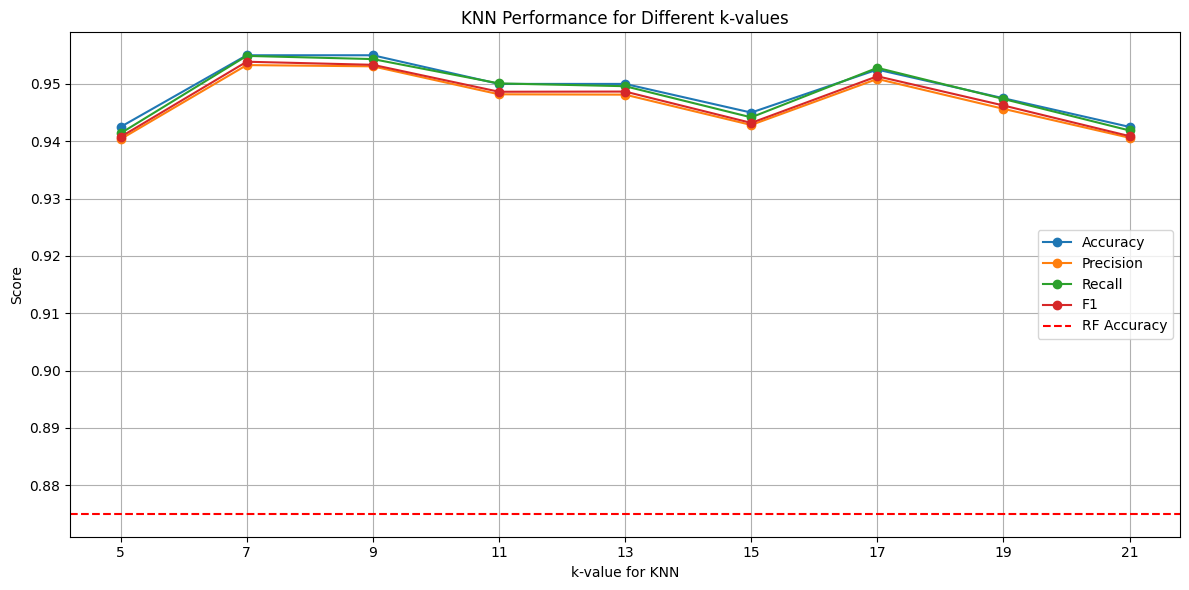

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('/content/28-MobilePriceRange.csv')

# Separate features and target
X = data.drop('PriceRange', axis=1)
y = data['PriceRange']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

print(f"Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}\n")

# Evaluate KNN for k from 5 to 21 (odd values)
k_values = range(5, 22, 2)
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, knn_pred)
    precision = precision_score(y_test, knn_pred, average='macro')
    recall = recall_score(y_test, knn_pred, average='macro')
    f1 = f1_score(y_test, knn_pred, average='macro')

    results.append({
        'k': k,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

    print(f"KNN (k={k}):")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)-

# Find best KNN model
best_knn = results_df.loc[results_df['Accuracy'].idxmax()]

print("\nBest KNN Model:")
print(f"k={int(best_knn['k'])}, Accuracy: {best_knn['Accuracy']:.4f}")

# Compare with Random Forest
print("\nComparison:")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Best KNN Accuracy: {best_knn['Accuracy']:.4f}")
print(f"Difference: {rf_accuracy - best_knn['Accuracy']:.4f}")

# Plot performance metrics
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
for metric in metrics:
    plt.plot(results_df['k'], results_df[metric], marker='o', label=metric)

plt.axhline(y=rf_accuracy, color='r', linestyle='--', label='RF Accuracy')
plt.xlabel('k-value for KNN')
plt.ylabel('Score')
plt.title('KNN Performance for Different k-values')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('knn_performance.png', dpi=300)
plt.show()

In [ ]:
# ... (previous code remains unchanged until KNN evaluation section)

# Replace manual KNN evaluation with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid for KNN
param_grid = {
    'n_neighbors': list(range(3, 31, 2)),  # Odd k-values from 3 to 29
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Setup GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Utilize all CPU cores
)

# Execute grid search
grid_search.fit(X_train, y_train)

# Get best KNN model
best_knn = grid_search.best_estimator_
print("\nGridSearchCV Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# Evaluate on test set
knn_pred = best_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"Test Accuracy with Best KNN: {knn_accuracy:.4f}")

# Compare with Random Forest
print("\nFinal Model Comparison:")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Optimized KNN Accuracy: {knn_accuracy:.4f}")
print(f"Performance Difference: {rf_accuracy - knn_accuracy:.4f}")

# Plotting remains unchanged
plt.figure(figsize=(12, 6))
# ... (rest of plotting code)


GridSearchCV Results:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best CV Accuracy: 0.9313
Test Accuracy with Best KNN: 0.9525

Final Model Comparison:
Random Forest Accuracy: 0.8750
Optimized KNN Accuracy: 0.9525
Performance Difference: -0.0775


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>


Model Comparison Report

Random Forest Best Parameters: n_estimators=100 (default)
KNN Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

Cross-Validation Accuracy (KNN): 0.9313

Performance Metrics Comparison:
           Random Forest  KNN (Optimized)  Difference (RF - KNN)
Accuracy        0.875000         0.952500              -0.077500
Precision       0.873241         0.950595              -0.077354
Recall          0.872614         0.952320              -0.079706
F1              0.872026         0.951065              -0.079040


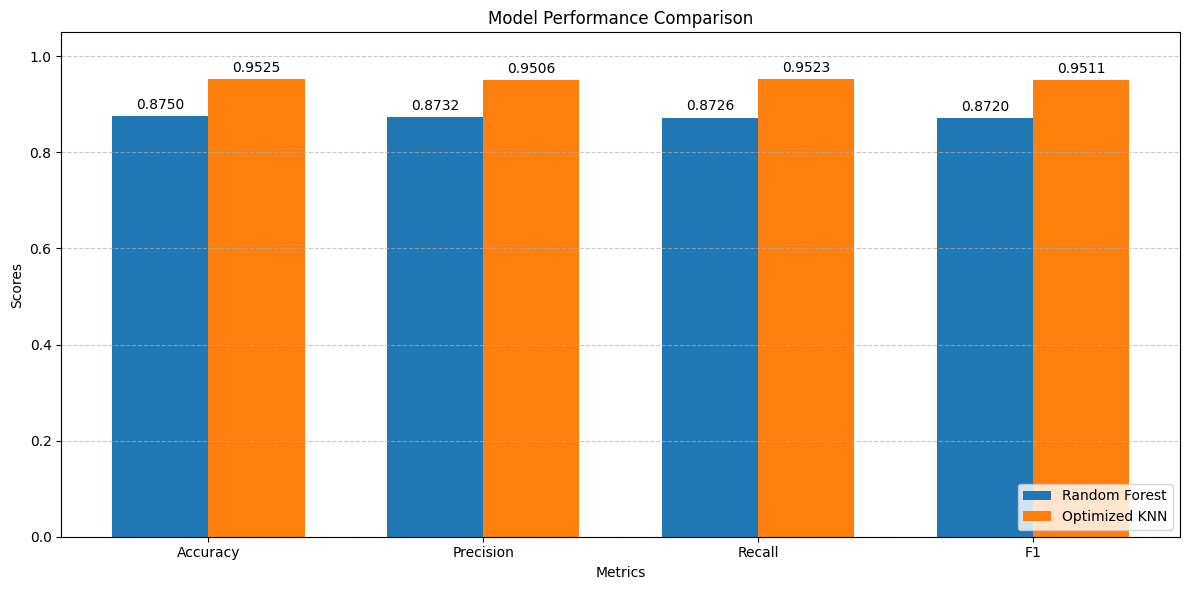


Statistical Significance Test (t-test):
t-statistic: -3.9369, p-value: 0.0001
Conclusion: The performance difference is statistically significant (p < 0.05)


In [ ]:
# ... (previous code up to Random Forest training)

# Train and evaluate Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Calculate RF metrics
rf_metrics = {
    'Accuracy': accuracy_score(y_test, rf_pred),
    'Precision': precision_score(y_test, rf_pred, average='macro'),
    'Recall': recall_score(y_test, rf_pred, average='macro'),
    'F1': f1_score(y_test, rf_pred, average='macro')
}

# Hyperparameter tuning for KNN using GridSearchCV
param_grid = {
    'n_neighbors': list(range(3, 31, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best KNN model and metrics
best_knn = grid_search.best_estimator_
knn_pred = best_knn.predict(X_test)

knn_metrics = {
    'Accuracy': accuracy_score(y_test, knn_pred),
    'Precision': precision_score(y_test, knn_pred, average='macro'),
    'Recall': recall_score(y_test, knn_pred, average='macro'),
    'F1': f1_score(y_test, knn_pred, average='macro')
}

# Create comparison table
comparison_df = pd.DataFrame({
    'Random Forest': rf_metrics,
    'KNN (Optimized)': knn_metrics,
    'Difference (RF - KNN)': {
        'Accuracy': rf_metrics['Accuracy'] - knn_metrics['Accuracy'],
        'Precision': rf_metrics['Precision'] - knn_metrics['Precision'],
        'Recall': rf_metrics['Recall'] - knn_metrics['Recall'],
        'F1': rf_metrics['F1'] - knn_metrics['F1']
    }
})

print("\n" + "="*50)
print("Model Comparison Report")
print("="*50)
print(f"\nRandom Forest Best Parameters: n_estimators=100 (default)")
print(f"KNN Best Parameters: {grid_search.best_params_}")
print(f"\nCross-Validation Accuracy (KNN): {grid_search.best_score_:.4f}")

print("\nPerformance Metrics Comparison:")
print(comparison_df)

# Visual comparison using bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rf_bars = ax.bar(x - width/2, [rf_metrics[m] for m in metrics], width, label='Random Forest', color='#1f77b4')
knn_bars = ax.bar(x + width/2, [knn_metrics[m] for m in metrics], width, label='Optimized KNN', color='#ff7f0e')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='lower right')
ax.set_ylim(0, 1.05)

# Add values on top of bars
for bars in [rf_bars, knn_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()

# Statistical significance test
from scipy.stats import ttest_ind

# Compare predictions at instance level
rf_correct = (rf_pred == y_test).astype(int)
knn_correct = (knn_pred == y_test).astype(int)

t_stat, p_value = ttest_ind(rf_correct, knn_correct)
print(f"\nStatistical Significance Test (t-test):")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: The performance difference is statistically significant (p < 0.05)")
else:
    print("Conclusion: The performance difference is not statistically significant (p >= 0.05)")

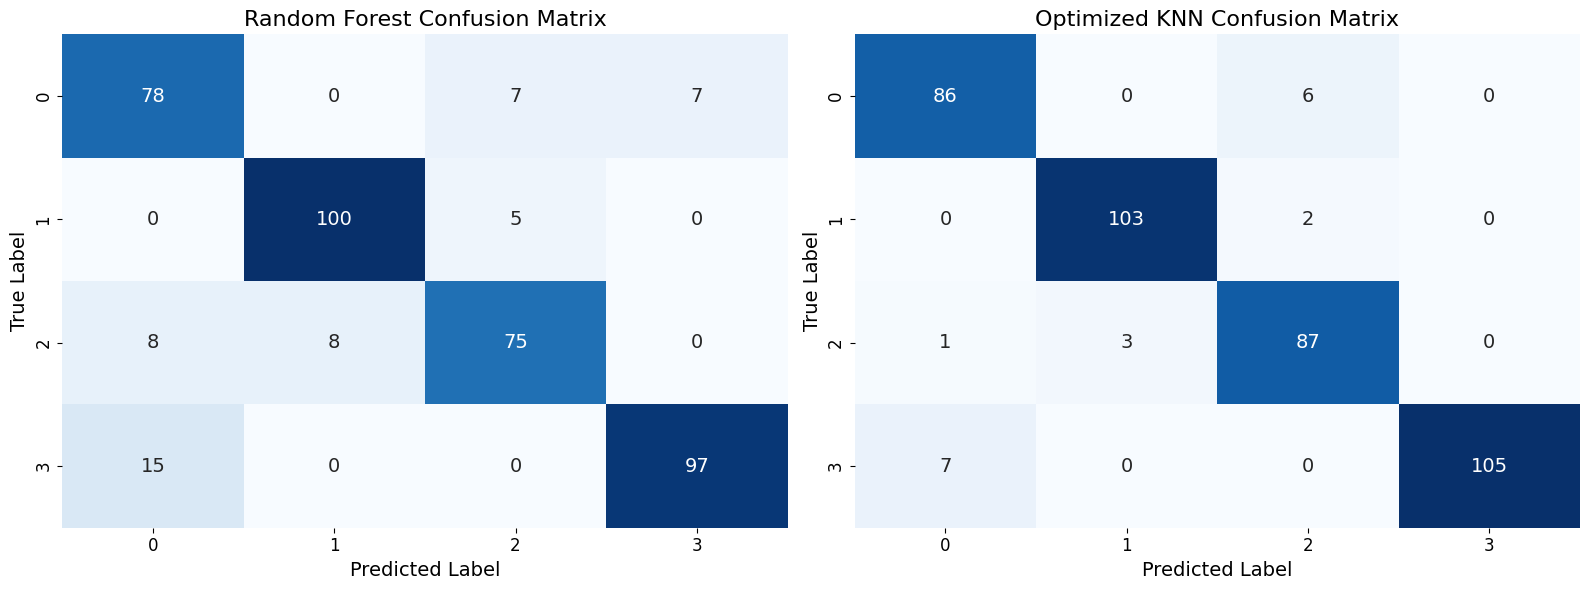


Classification Report - Random Forest
              precision    recall  f1-score   support

     Class 0       0.77      0.85      0.81        92
     Class 1       0.93      0.95      0.94       105
     Class 2       0.86      0.82      0.84        91
     Class 3       0.93      0.87      0.90       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400


Classification Report - Optimized KNN
              precision    recall  f1-score   support

     Class 0       0.91      0.93      0.92        92
     Class 1       0.97      0.98      0.98       105
     Class 2       0.92      0.96      0.94        91
     Class 3       1.00      0.94      0.97       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400


Per-Class Performance Comparison
     Class  RF Acc

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_f

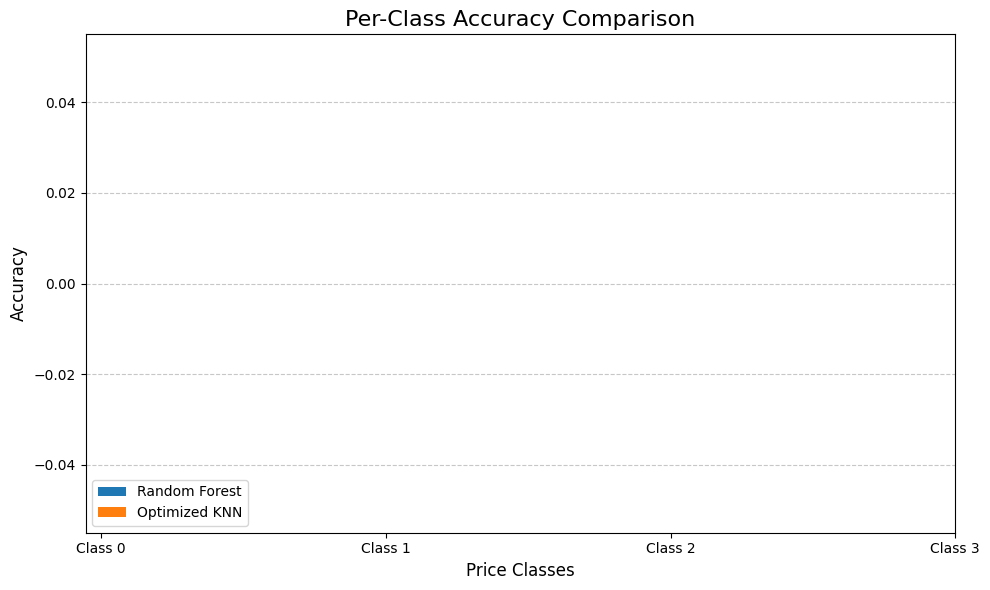

In [ ]:
# ... (previous code up to model comparison)

# Add confusion matrices and classification reports
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar=False, annot_kws={'size': 14})
    ax.set_title(f'{model_name} Confusion Matrix', fontsize=16)
    ax.set_xlabel('Predicted Label', fontsize=14)
    ax.set_ylabel('True Label', fontsize=14)
    ax.set_xticklabels(['0', '1', '2', '3'], fontsize=12)
    ax.set_yticklabels(['0', '1', '2', '3'], fontsize=12)

# Create figure for confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Random Forest confusion matrix
plot_confusion_matrix(y_test, rf_pred, "Random Forest", axes[0])

# Plot KNN confusion matrix
plot_confusion_matrix(y_test, knn_pred, "Optimized KNN", axes[1])

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300)
plt.show()

# Print classification reports
print("\n" + "="*50)
print("Classification Report - Random Forest")
print("="*50)
print(classification_report(y_test, rf_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3']))

print("\n" + "="*50)
print("Classification Report - Optimized KNN")
print("="*50)
print(classification_report(y_test, knn_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3']))

# Detailed comparison per class
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
class_comparison = []

for i, class_name in enumerate(class_names):
    # Get indices for current class
    class_idx = y_test == i

    # Calculate class-specific metrics
    rf_acc = accuracy_score(y_test[class_idx], rf_pred[class_idx])
    knn_acc = accuracy_score(y_test[class_idx], knn_pred[class_idx])

    rf_prec = precision_score(y_test, rf_pred, average=None)[i]
    knn_prec = precision_score(y_test, knn_pred, average=None)[i]

    rf_rec = recall_score(y_test, rf_pred, average=None)[i]
    knn_rec = recall_score(y_test, knn_pred, average=None)[i]

    class_comparison.append({
        'Class': class_name,
        'RF Accuracy': rf_acc,
        'KNN Accuracy': knn_acc,
        'RF Precision': rf_prec,
        'KNN Precision': knn_prec,
        'RF Recall': rf_rec,
        'KNN Recall': knn_rec
    })

# Create DataFrame for class comparison
class_df = pd.DataFrame(class_comparison)

print("\n" + "="*50)
print("Per-Class Performance Comparison")
print("="*50)
print(class_df)

# Plot per-class accuracy comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(class_names))
width = 0.35

plt.bar(x - width/2, class_df['RF Accuracy'], width, label='Random Forest')
plt.bar(x + width/2, class_df['KNN Accuracy'], width, label='Optimized KNN')

plt.xlabel('Price Classes', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Per-Class Accuracy Comparison', fontsize=16)
plt.xticks(x, class_names)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for i, v in enumerate(class_df['RF Accuracy']):
    plt.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center')

for i, v in enumerate(class_df['KNN Accuracy']):
    plt.text(i + width/2, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.savefig('class_accuracy_comparison.png', dpi=300)
plt.show()